https://www.kaggle.com/code/bhavinmoriya/cifar10-multiclass-classification-using-cnn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
import tensorflow as tf

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Define the number of images per class you want to keep
num_images_per_class = 100

# Define a function to filter images and labels
def filter_images_labels(images, labels, num_images_per_class):
    filtered_images = []
    filtered_labels = []
    class_counts = {}
    for i in range(len(images)):
        label = labels[i][0]
        if label not in class_counts:
            class_counts[label] = 0
        if class_counts[label] < num_images_per_class:
            filtered_images.append(images[i])
            filtered_labels.append(label)
            class_counts[label] += 1
    return np.array(filtered_images), np.array(filtered_labels)

# Filter train and test datasets
filtered_train_images, filtered_train_labels = filter_images_labels(train_images, train_labels, num_images_per_class)
filtered_test_images, filtered_test_labels = filter_images_labels(test_images, test_labels, num_images_per_class)

# Reducimos a 1000 imágenes por clase
train_image = filtered_train_images
train_label = filtered_train_labels

In [3]:
print(f"Shape of train image is: {train_image.shape}\n")
print(f'Shape of train label is: {train_label.shape}\n')

Shape of train image is: (1000, 32, 32, 3)

Shape of train label is: (1000,)



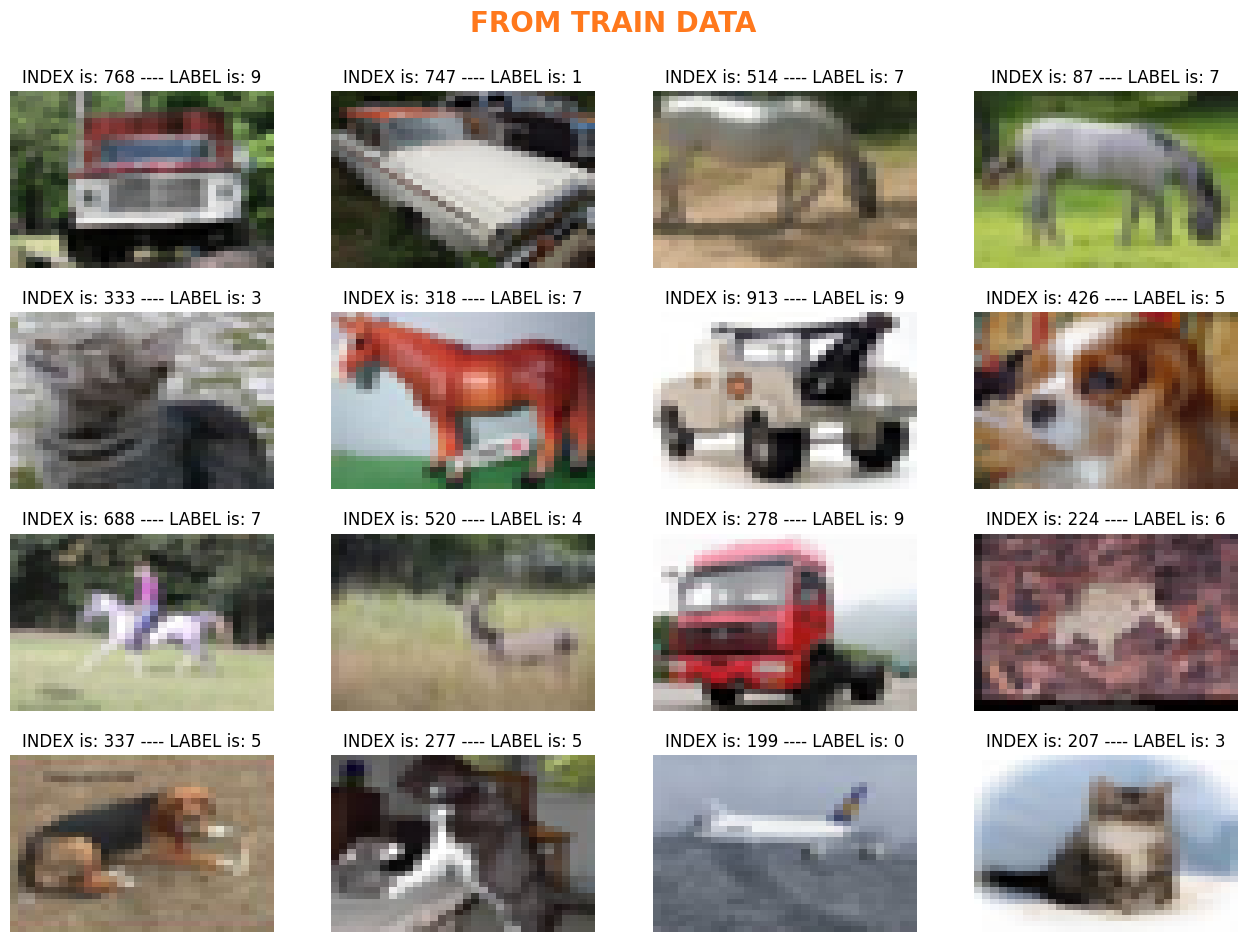

In [4]:
fig, axes = plt.subplots(4,4, figsize=(13,9))
fig.tight_layout()
plt.suptitle("FROM TRAIN DATA\n\n\n\n", size = 20, va = 'center', color = '#ff781c', fontweight='bold')

for i in range(4):
    for j in range(4):

        # Select random number b/w 0 and length of train_image
        rand_num = np.random.randint(0, len(train_image) + 1)
        img = train_image[rand_num]      # image at specific index
        label = train_label[rand_num]    # label number of image

        axes[i][j].imshow(img, aspect='auto')
        axes[i][j].set_title(f"INDEX is: {rand_num} ---- LABEL is: {label}")
        axes[i][j].axis('off')

In [5]:
train_label = train_label.reshape(train_label.shape[0])

In [6]:
classes = ["Airplane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

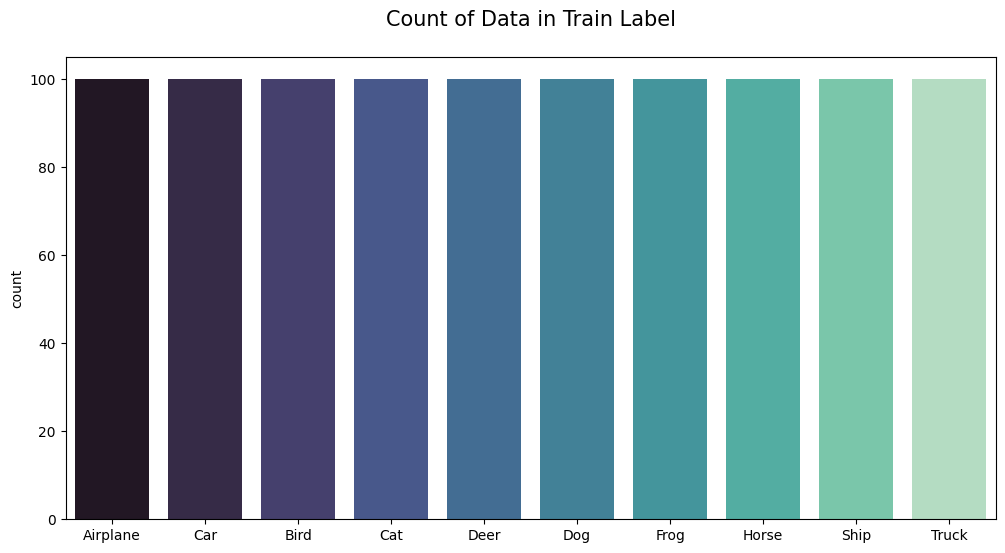

In [7]:
plt.figure(figsize = (12,6))
plt.title("Count of Data in Train Label\n", size = 15)

sns.countplot(x = train_label, palette='mako').set(xticklabels = classes);

In [8]:
print(f"Maximum value in train_images is: {train_image.max()}")
print(f"Minimum value in train_images is: {train_image.min()}\n")

Maximum value in train_images is: 255
Minimum value in train_images is: 0



In [9]:
# Normalizamos entre 0 y 1
train_image = train_image.astype('float64') / 255.0

In [10]:
print(f"Maximum value in train_images is: {train_image.max()}")
print(f"Minimum value in train_images is: {train_image.min()}\n")

Maximum value in train_images is: 1.0
Minimum value in train_images is: 0.0



In [11]:
train_label = to_categorical(train_label, num_classes = 10)
#test_label = to_categorical(test_label, num_classes = 10)

In [12]:
input_shape = train_image.shape[1:]
num_classes = 10

In [13]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 3, padding = "same",activation = "relu", input_shape = input_shape))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = "softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1050890 (4.01 MB)
Trainable params: 1050890 (4.01 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

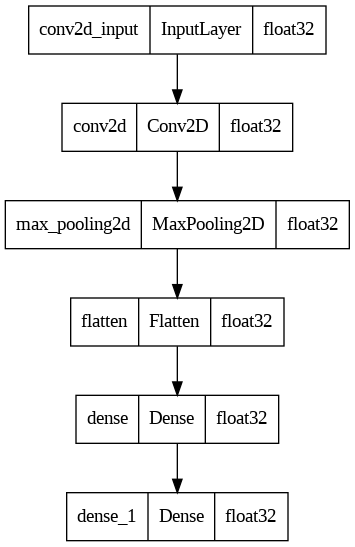

In [15]:
plot_model(model, show_dtype = True, show_layer_names = True)

In [16]:
from keras.optimizers import SGD

lr = 0.01
sgd = SGD(learning_rate=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [17]:
result = model.fit(train_image, train_label,
                   epochs = 30,
                   batch_size = 32)

Epoch 1/30
32/32 [==============================] - 3s 50ms/step - loss: 2.2823 - accuracy: 0.1260
Epoch 2/30
32/32 [==============================] - 2s 50ms/step - loss: 2.2239 - accuracy: 0.1690
Epoch 3/30
32/32 [==============================] - 2s 53ms/step - loss: 2.1634 - accuracy: 0.2080
Epoch 4/30
32/32 [==============================] - 2s 48ms/step - loss: 2.1117 - accuracy: 0.2530
Epoch 5/30
32/32 [==============================] - 1s 31ms/step - loss: 2.0649 - accuracy: 0.2600
Epoch 6/30
32/32 [==============================] - 1s 43ms/step - loss: 2.0185 - accuracy: 0.2620
Epoch 7/30
32/32 [==============================] - 1s 39ms/step - loss: 1.9754 - accuracy: 0.2860
Epoch 8/30
32/32 [==============================] - 1s 26ms/step - loss: 1.9340 - accuracy: 0.3050
Epoch 9/30
32/32 [==============================] - 1s 27ms/step - loss: 1.9175 - accuracy: 0.3270
Epoch 10/30
32/32 [==============================] - 1s 27ms/step - loss: 1.8786 - accuracy: 0.3280
Epoch 11/